          ©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited

## AIML Module Project - FMT - Project 


### --> Assessment [ Total Score: 60 points ]

Please refer to the problem statement for questions and descriptions

## 0. Import Libraries

In [ ]:
#Mount drive to access dataset and notebook from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix


## 0. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 1. Import and understand the data


In [ ]:
# read csv file using pandas
df = pd.read_csv('gdrive/My Drive/Lab/signal-data.csv')

In [ ]:
# to display the top 5 rows of the dataframe
df.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.9300000,2564.0000000,2187.7333000,1411.1265000,1.3602000,100.0000000,97.6133000,0.1242000,1.5005000,0.0162000,-0.0034000,0.9455000,202.4396000,0.0000000,7.9558000,414.8710000,10.0433000,0.9680000,192.3963000,12.5190000,1.4026000,-5419.0000000,2916.5000000,-4043.7500000,751.0000000,0.8955000,1.7730000,3.0490000,64.2333000,2.0222000,0.1632000,3.5191000,83.3971000,9.5126000,50.6170000,64.2588000,49.3830000,66.3141000,86.9555000,117.5132000,61.2900000,4.5150000,70.0000000,352.7173000,10.1841000,130.3691000,723.3092000,1.3072000,141.2282000,1.0000000,624.3145000,218.3174000,0.0000000,4.5920000,4.8410000,2834.0000000,0.9317000,0.9484000,4.7057000,-1.7264000,350.9264000,10.6231000,108.6427000,16.1445000,21.7264000,29.5367000,693.7724000,0.9226000,148.6009000,1.0000000,608.1700000,84.0793000,nan,nan,0.0000000,0.0126000,-0.0206000,0.0141000,-0.0307000,-0.0083000,-0.0026000,-0.0567000,-0.0044000,7.2163000,0.1320000,nan,2.3895000,0.9690000,1747.6049000,0.1841000,8671.9301000,-0.3274000,-0.0055000,-0.0001000,0.0001000,0.0003000,-0.2786000,0.0000000,0.3974000,-0.0251000,0.0002000,0.0002000,0.1350000,-0.0042000,0.0003000,0.0056000,0.0000000,-0.2468000,0.3196000,nan,nan,nan,nan,0.9460000,0.0000000,748.6115000,0.9908000,58.4306000,0.6002000,0.9804000,6.3788000,15.8800000,2.6390000,15.9400000,15.9300000,0.8656000,3.3530000,0.4098000,3.1880000,-0.0473000,0.7243000,0.9960000,2.2967000,1000.7263000,39.2373000,123.0000000,111.3000000,75.2000000,46.2000000,350.6710000,0.3948000,0.0000000,6.7800000,0.0034000,0.0898000,0.0850000,0.0358000,0.0328000,12.2566000,0.0000000,4.2710000,10.2840000,0.4734000,0.0167000,11.8901000,0.4100000,0.0506000,nan,nan,1017.0000000,967.0000000,1066.0000000,368.0000000,0.090

In [ ]:
df.shape

(1567, 592)

### Dataframe has 592 columns and 1567 rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


#### There are 1567 rows and 592 columns
#### There is 1 int type feature, 1 object type, and remaining 590 float type features
#### The number of rows are less compared to given features

## 2. Data Cleansing

Data preparation is the process of cleaning and transforming raw data prior to building predictive models.

In [ ]:
# check for missing values
missing_values = df.isnull().sum().any()

# print the number of missing values of each variable
print(missing_values)

True


- Let's drop features havinng more than 700 missing values

In [ ]:
d = df.isnull().sum()
j = []
for i in d.keys():
    if(d[i] >700):
        print(i, d[i])
        j.append(i)


72 794
73 794
85 1341
109 1018
110 1018
111 1018
112 715
157 1429
158 1429
220 1341
244 1018
245 1018
246 1018
247 715
292 1429
293 1429
345 794
346 794
358 1341
382 1018
383 1018
384 1018
385 715
492 1341
516 1018
517 1018
518 1018
519 715
578 949
579 949
580 949
581 949


In [ ]:
df_new = df.drop(j, axis = 1)

In [ ]:
df_new.shape

(1567, 560)

In [ ]:
df_new.isnull().any().any()

True

In [ ]:
df_new.isna().sum()

Time           0
0              6
1              7
2             14
3             14
4             14
5             14
6             14
7              9
8              2
9              2
10             2
11             2
12             2
13             3
14             3
15             3
16             3
17             3
18             3
19            10
20             0
21             2
22             2
23             2
24             2
25             2
26             2
27             2
28             2
29             2
30             2
31             2
32             1
33             1
34             1
35             1
36             1
37             1
38             1
39             1
40            24
41            24
42             1
43             1
44             1
45             1
46             1
47             1
48             1
49             1
50             1
51             1
52             1
53             4
54             4
55             4
56             4
57            

- Imputing missing values of remaining fetaures with their mean value

In [ ]:
dff = df_new.fillna(df_new.mean())

In [ ]:
dff.isna().sum().any()

False

In [ ]:
dff.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000

In [ ]:
 # Taking care of missing data using Imputer
  #from sklearn.preprocessing import Imputer
  #imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
  

- We have already dropped features having more than ~40% of missing values.
- We will check feature importance and take a call if we can further reduce the number of features.
Other methods:-
- We can drop features having zero std deviation post checking their importance.
- We can use forward selection OR backward elimination method for feature selection.
- We can apply PCA to reduce the overall number of features

## 3. Data analysis & visualisation

3.1 Perform detailed relevant statistical analysis on the data.

3.2 Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis



In [ ]:
stats = dff.describe()

In [ ]:
stats

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000

- The above output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.
- We can see that certain features are reduntant like "5" , "13" because here all values are 100 and 0 resepectively.
- Pass/fail is the target feature
- Most of the features have float values in different ranges. We will plot separate graphs to understand them

In [ ]:
std = dff.std(axis = 0)

In [ ]:
std[std == 0].shape

(116,)

- There are 116 feature having the same value for all rows. 

In [ ]:
zero_std = std[std == 0]
col_to_drop = zero_std.index.tolist()

In [ ]:
non_zero_std_dff = dff.drop(columns= col_to_drop, axis =1)
non_zero_std_dff.shape

(1567, 444)

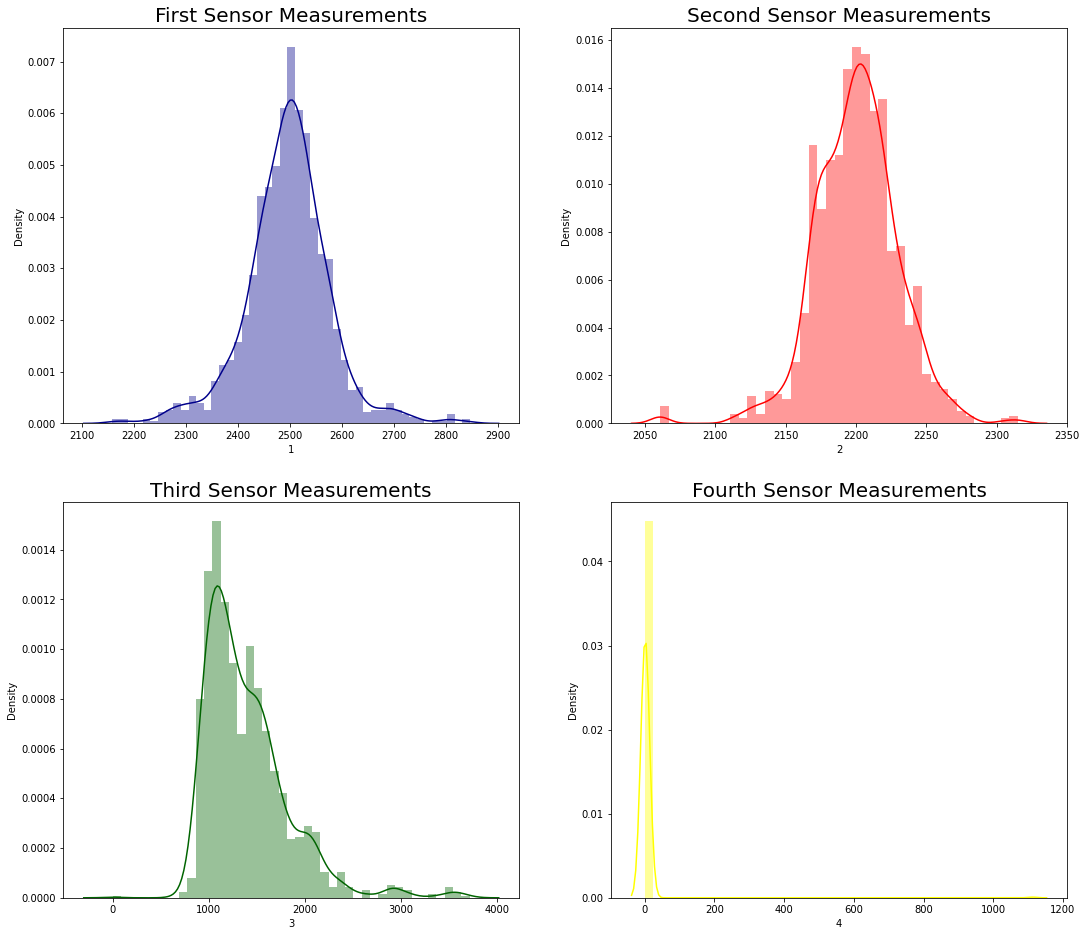

In [ ]:
# distribution plot to see first four column's distribution

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.distplot(dff['1'], color = 'darkblue')
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
sns.distplot(dff['2'], color = 'red')
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
sns.distplot(dff['3'], color = 'darkgreen')
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
sns.distplot(dff['4'], color = 'yellow')
plt.title('Fourth Sensor Measurements', fontsize = 20)

plt.show()

- We can see that feature 1,2,3 are quite normally distributed wheareas feature 4 is centred around zero and has a long tail toward right side.


In [ ]:
cor = dff.corr()

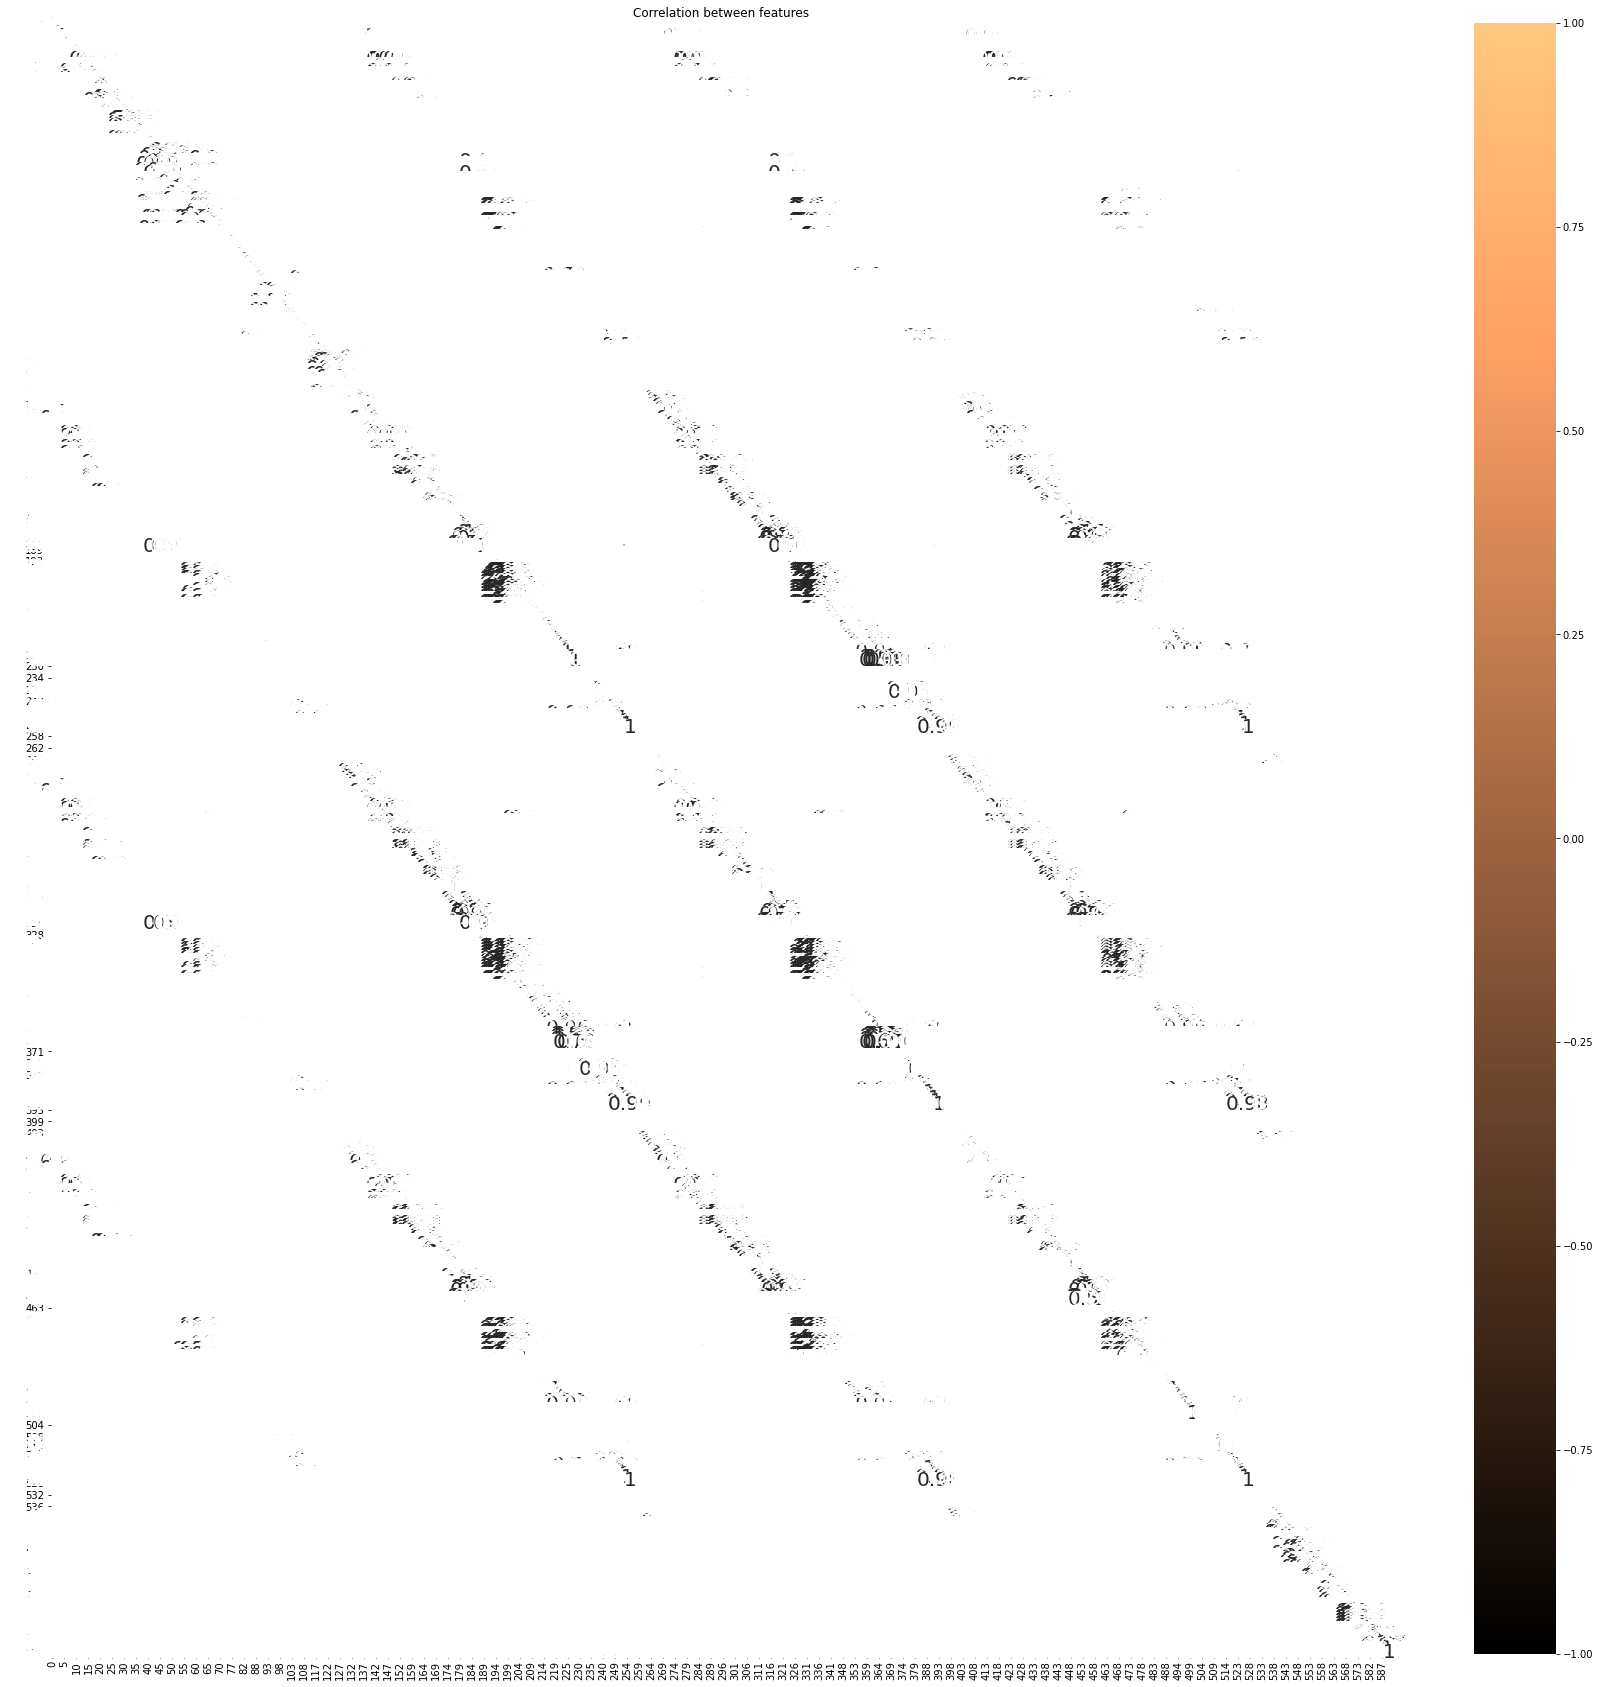

In [ ]:
# To get a correlation matrix 
# Ploting correlation plot 
plt.figure(figsize=(30, 30))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

sns.heatmap(cor, cmap='copper', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 20})

# specify name of the plot
plt.title('Correlation between features')
plt.show()

- There are too many feature hence bivarite plot is messy.
- We do see black color in non-diagonal places which tells us that there are correlated features


## 4. Data pre-processing


In [ ]:
# Select independent features for model building. ( ID is dropped)
X = dff.drop(['Pass/Fail', 'Time'], axis=1)

y = dff['Pass/Fail']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )

# checking the dimensions of the train & test subset
# to print dimension of train set
print(X_train.shape)
# to print dimension of test set
print(X_test.shape)

(1096, 558)
(471, 558)


In [ ]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
594,3042.7000000,2355.1100000,2242.8555000,1430.7270000,0.8832000,100.0000000,106.2100000,0.1216000,1.4817000,0.0030000,0.0049000,0.9771000,197.4725000,0.0000000,5.3541000,400.4759000,10.6081000,0.9848000,186.8644000,12.4990000,1.4068000,-6585.7500000,2915.0000000,-4569.5000000,1191.2500000,0.9890000,1.8927000,5.2405000,67.4778000,3.0000000,0.2010000,4.7084000,83.7263000,8.7867000,50.1980000,64.0159000,49.8020000,66.3724000,86.5708000,118.6914000,76.1500000,2.9560000,70.0000000,361.7718000,9.6066000,136.5209000,734.1845000,0.8420000,131.5618000,1.0000000,629.8546000,127.4543000,0.0000000,4.6420000,4.8900000,2843.0000000,0.9302000,0.9492000,4.5729000,0.7227000,365.0782000,9.8450000,117.2436000,10.3116000,19.2773000,24.1852000,709.9994000,1.0078000,138.4818000,1.0000000,620.8036000,90.6389000,0.0000000,-0.0244000,-0.0060000,-0.0090000,-0.0404000,0.0150000,0.0007000,-0.0229000,0.0544000,7.6453000,0.1297000,2.3757000,0.9619000,1865.0032000,0.1774000,8437.5501000,-0.0836000,0.0023000,-0.0031000,0.0003000,0.0001000,-0.4514000,0.0000000,0.9299000,-0.0586000,0.0000000,0.0004000,0.0103000,-0.0150000,0.0008000,-0.0023000,0.0031000,-0.0716000,-0.0298000,0.9479000,0.0000000,731.4240000,0.9915000,58.9889000,0.6059000,0.9645000,6.3576000,15.9100000,4.3920000,15.9400000,15.8900000,1.2390000,2.4530000,0.6586000,2.9100000,-0.5204000,0.7586000,0.9981000,2.2967000,1003.0211000,38.9026000,147.0000000,192.0000000,131.4000000,62.9001000,227.0289000,0.1099000,0.0000000,5.6700000,0.0039000,0.0851000,0.0546000,0.0400000,0.0053000,4.8149000,0.0000000,5.2360000,20.6380000,0.5231000,0.0059000,4.3372000,0.3800000,0.0794000,408.0000000,595.0000000,4083.0000000,373.0000000,0.0940000,0.0730000,0.0330000,2.7000000,0.7000000,0.0710000,0.1340000,0.6531000,0.1175000,0.3377000,0.6535000,0.3376000,0.5457000,0.1211000,0.9640000,0.0000000,0.0000000,18.5500000,0.1720000,9.1000000,32

### 4.3 Check for target balancing and fix it if found imbalanced

 SMOTE: Synthetic Minority Over-sampling Technique

In [ ]:
pd.value_counts(dff['Pass/Fail'])

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '-1': {} \n".format(sum(y_train==-1)))

Before OverSampling, counts of label '1': 73
Before OverSampling, counts of label '-1': 1023 



In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (2046, 558)
After OverSampling, the shape of train_y: (2046,) 



In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '-1': {}".format(sum(y_train_res==-1)))

After OverSampling, counts of label '1': 1023
After OverSampling, counts of label '-1': 1023


In [ ]:
pd.value_counts(y_test)

-1    440
 1     31
Name: Pass/Fail, dtype: int64

### 4.4 - Standardise the data if required

In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train_sc = sc.fit_transform(X_train_res)
x_test_sc = sc.transform(X_test)

### 4.5 - Check if the train and test data have similar statistical characteristics when compared with original data.

In [ ]:
dff.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000,1567.0000000

In [ ]:
X_train_res_df = pd.DataFrame(X_train_res)
X_train_res_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557
count,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000,2046.0000000

In [ ]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
count,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000000,471.0000

- We see that test data is quite similar to the original df
- Analyzing resampled train data:- we see that mean is quite similar to the original df. But there is some difference in the standard deviation of a few features. We could perform further statistical analysis to confirm if there is any significant difference.


## 5. Model training, testing and tuning 

#### Logistic Regression

In [ ]:
lr2 = LogisticRegression(C = 1000, penalty = 'l2')
lr2.fit(x_train_sc, y_train_res)

y_pred_lr2 = lr2.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_lr2, y_test))
cm = confusion_matrix(y_pred_lr2, y_test)
cm

accuracy score 0.861995753715499


array([[396,  21],
       [ 44,  10]])

In [ ]:
# import function for ridge regression
from sklearn.linear_model import RidgeClassifier

tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
 
# instantiate the Ridge() method
ridge = RidgeClassifier()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(x_train_sc, y_train_res)

# get the best parameters
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 7}


In [ ]:
lr2 = RidgeClassifier(alpha=7)
lr2.fit(x_train_sc, y_train_res)

y_pred_lr2 = lr2.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_lr2, y_test))
cm = confusion_matrix(y_pred_lr2, y_test)
cm

accuracy score 0.832271762208068


array([[375,  14],
       [ 65,  17]])

- Regularization reduced the accuracy but minority class is better represented.

#### Random Forest

In [ ]:
forest = RandomForestClassifier()
forest.fit(x_train_sc, y_train_res)

y_pred_rf = forest.predict(x_test_sc)
print('accuracy score', accuracy_score(y_pred_rf, y_test))
print('confusion_matrix', confusion_matrix(y_pred_rf, y_test))
print('precision_score', average_precision_score(y_pred_rf, y_test))

accuracy score 0.9341825902335457
confusion_matrix [[439  30]
 [  1   1]]
precision_score 0.0182521745085953


- We see that accuracy of logistic regression model is comparatively less than the random forest model
- Precision is very low in the case of the random forest
- The default random forest model is biased toward 1 class even when we are training the model on balanced dataset

In [ ]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators= 50, criterion= 'gini')

# making a parameters list
parameters = {
    'max_depth' : [10, 50, 100, 150],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3]}

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'f1', cv = 3, n_jobs = -1)
grid_search = grid_search.fit(x_train_sc, y_train_res)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

predictions = grid_search.predict(x_test_Sc)

print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)
print(classification_report(y_test, predictions))

Best Accuracy:  0.9906707444882715
Best Parameter:  {'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 3}
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       440
           1       0.50      0.03      0.06        31

    accuracy                           0.93       471
   macro avg       0.72      0.51      0.51       471
weighted avg       0.91      0.93      0.91       471



In [ ]:
model = RandomForestClassifier(n_estimators= 50, criterion= 'gini', max_depth= 100)
model.fit(x_train_sc, y_train_res)

y_pred_rf = model.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_rf, y_test))
print('confusion_matrix', confusion_matrix(y_pred_rf, y_test))
print('precision_score', average_precision_score(y_pred_rf, y_test))

accuracy score 0.9299363057324841
confusion_matrix [[438  31]
 [  2   0]]
precision_score 0.004246284501061571


Text(0.5, 0, 'Relative Importance')

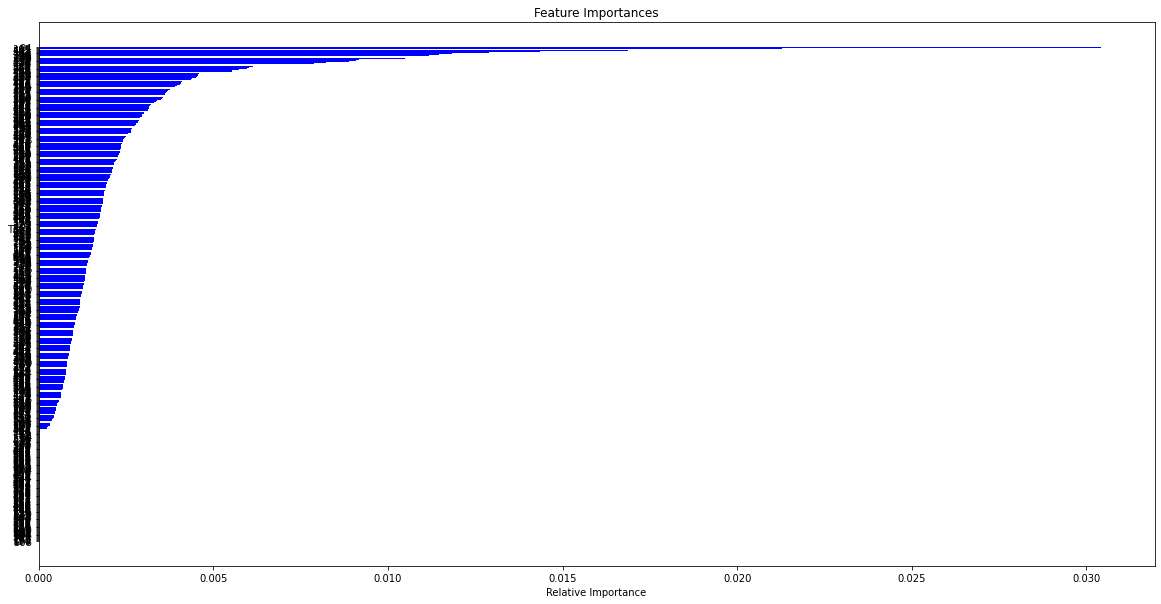

In [ ]:
features= dff.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize= (20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

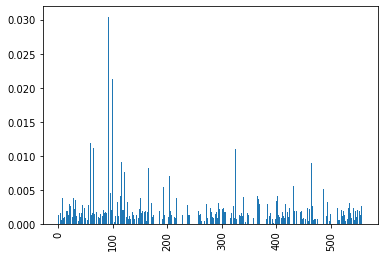

In [ ]:
#fs = pd.DataFrame(xgb1.feature_importances_, columns= [X_train.columns, 'importance'])

importance = model.feature_importances_
# summarize feature importance
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(rotation=90)
pyplot.show()

- There are many features having very little importance

In [ ]:
feature_df = pd.DataFrame(importance, index=X_train.columns)
feature_df.shape

(558, 1)

In [ ]:
importance.nonzero()

(array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  43,  44,  45,  46,  47,  48,  50,  51,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  70,
         71,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138,
        139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 171, 172, 173, 174, 175, 176, 178, 179, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196

#### PCA

In [ ]:
dff.head(2)

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.9300000,2564.0000000,2187.7333000,1411.1265000,1.3602000,100.0000000,97.6133000,0.1242000,1.5005000,0.0162000,-0.0034000,0.9455000,202.4396000,0.0000000,7.9558000,414.8710000,10.0433000,0.9680000,192.3963000,12.5190000,1.4026000,-5419.0000000,2916.5000000,-4043.7500000,751.0000000,0.8955000,1.7730000,3.0490000,64.2333000,2.0222000,0.1632000,3.5191000,83.3971000,9.5126000,50.6170000,64.2588000,49.3830000,66.3141000,86.9555000,117.5132000,61.2900000,4.5150000,70.0000000,352.7173000,10.1841000,130.3691000,723.3092000,1.3072000,141.2282000,1.0000000,624.3145000,218.3174000,0.0000000,4.5920000,4.8410000,2834.0000000,0.9317000,0.9484000,4.7057000,-1.7264000,350.9264000,10.6231000,108.6427000,16.1445000,21.7264000,29.5367000,693.7724000,0.9226000,148.6009000,1.0000000,608.1700000,84.0793000,0.0000000,0.0126000,-0.0206000,0.0141000,-0.0307000,-0.0083000,-0.0026000,-0.0567000,-0.0044000,7.2163000,0.1320000,2.3895000,0.9690000,1747.6049000,0.1841000,8671.9301000,-0.3274000,-0.0055000,-0.0001000,0.0001000,0.0003000,-0.2786000,0.0000000,0.3974000,-0.0251000,0.0002000,0.0002000,0.1350000,-0.0042000,0.0003000,0.0056000,0.0000000,-0.2468000,0.3196000,0.9460000,0.0000000,748.6115000,0.9908000,58.4306000,0.6002000,0.9804000,6.3788000,15.8800000,2.6390000,15.9400000,15.9300000,0.8656000,3.3530000,0.4098000,3.1880000,-0.0473000,0.7243000,0.9960000,2.2967000,1000.7263000,39.2373000,123.0000000,111.3000000,75.2000000,46.2000000,350.6710000,0.3948000,0.0000000,6.7800000,0.0034000,0.0898000,0.0850000,0.0358000,0.0328000,12.2566000,0.0000000,4.2710000,10.2840000,0.4734000,0.0167000,11.8901000,0.4100000,0.0506000,1017.0000000,967.0000000,1066.0000000,368.0000000,0.0900000,0.0480000,0.0950000,2.0000000,0.9000000,0.0690000,0.0460000,0.7250000,0.1139000,0.3183000,0.5888000,0.3184000,0.9499000,0.3979000,0.1600000,0.0000000,0.0000

In [ ]:
df_final = dff.drop(['Time', 'Pass/Fail'], axis=1)
target = dff['Pass/Fail']

In [ ]:
# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(df_final, target, test_size=0.3, random_state=42, stratify=target )


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.transform(X_test)

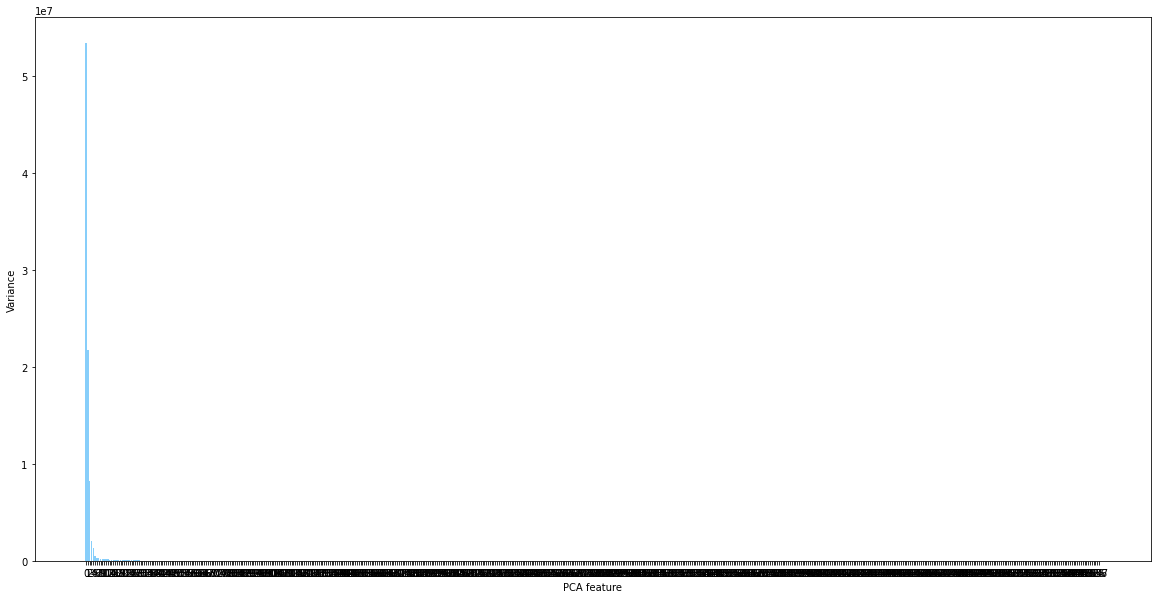

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)

pca.fit(df_final)

features = range(pca.n_components_)

plt.figure(figsize=(20,10))
plt.bar(features, pca.explained_variance_, color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=50) # taking 50 component
data_reduced = pca.fit_transform(x_train_std)
data_test = pca.transform(x_test_std)

In [ ]:
model = RandomForestClassifier(n_estimators= 50, criterion= 'gini', max_depth= 100)
model.fit(data_reduced, y_train)

y_pred_rf = model.predict(data_test)

print('accuracy score', accuracy_score(y_pred_rf, y_test))
print('confusion_matrix', confusion_matrix(y_pred_rf, y_test))
print('precision_score', average_precision_score(y_pred_rf, y_test))

accuracy score 0.9299363057324841
confusion_matrix [[438  31]
 [  2   0]]
precision_score 0.004246284501061571


# 6. Post Training and Conclusion

#### KNN

In [ ]:
# KNN - choosing the K value
from sklearn.metrics import accuracy_score
myList = list(range(2,15))

neighbors = KNeighborsClassifier()

ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in myList:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_sc, y_train_res)
  y_pred = knn.predict(x_test_sc)
  scores = accuracy_score(y_test, y_pred)
  ac_scores.append(scores)
  MSE = [1 - x for x in ac_scores]
  optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 2


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train_sc, y_train_res)

y_pred_knn = knn.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_knn, y_test))
cm = confusion_matrix(y_pred_knn, y_test)
cm

accuracy score 0.5520169851380042


array([[241,  12],
       [199,  19]])

#### Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=100, random_state=0)

gb.fit(x_train_sc, y_train_res)

y_pred_gb = gb.predict(x_test_sc)

print('accuracy score', accuracy_score(y_pred_gb, y_test))
cm = confusion_matrix(y_pred_gb, y_test)
cm

accuracy score 0.8641188959660298


array([[401,  25],
       [ 39,   6]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(n_estimators= 100)

# making a parameters list
parameters = {
    'max_depth' : [10, 50],
    'max_features' : [5,10]}

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'f1', cv = 3, n_jobs = -1)
grid_search = grid_search.fit(x_train_sc, y_train_res)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

predictions = grid_search.predict(x_test_sc)

print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)
print(classification_report(y_test, predictions))

Best Accuracy:  0.9970559124535695
Best Parameter:  {'max_depth': 50, 'max_features': 5}
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



- We tried the following models
- KNN - poor accuracy
- Logistic - good accuracy. Able to predict minority class as well
- Random forest - biased toward majority class
- Gradient boosting - biased toward majority class


- We would prefer a logistic model as it is giving decent result and it is able to predict both classes with decent accuracy.

### Pickle the selected model for future use.

In [ ]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lr2) 

In [ ]:
# Load the pickled model 

model_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
pred = model_from_pickle.predict(x_test_sc)

In [ ]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[375,  65],
       [ 14,  17]])

## Conclusion and Improvisation

- There were around 592 features which came down to 558 after treating missing values.

- Target class is highly imbalanced hence most of the algorithms are biased towards majority class

- We tried feature selection using boosting method and oberved that only a few features ( approx 50 ) are contrbuting in the prediction but they are biased toward majority class

- We used grid search for selecting the best hyperparamets

#### Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.
- We can use forward selection or backward elimination for selecting relevant features
- We require more data points as there are many features
- We can try multiple ways to balance the target class
- We can try PCA to reduce number of features 

## Further explore

In [ ]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1)

model.fit(X_train_res, y_train_res)
y_pred = model.fit_predict(x_test)

In [ ]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[369,  71],
       [ 25,   6]])